# 머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석 보고서


### 요약
비트코인은 가상화폐 시장에서 중요한 역할을 하는 암호화폐입니다. 비트코인의 가격 예측은 투자자와 거래자에게 큰 관심을 받으며, 이를 위해 머신러닝과 딥러닝 모델을 활용한 분석이 진행되고 있습니다. 본 보고서에서는 단순 회귀 분석부터 복잡한 딥러닝 모델까지 다양한 방법을 사용하여 비트코인 가격 예측을 수행하고, 그 결과와 고려사항에 대해 제시합니다.

### 목차
1. [데이터 수집](##1-데이터-수집)
2. [데이터 전처리](##2-데이터-전처리)
3. [탐색적 데이터 분석(EDA)](##3-탐색적-데이터-분석eda)
4. [모델 선택](##4-모델-선택)
5. [모델 평가](##5-모델-평가)
6. [결과 및 토의](##6-결과-및-토의)
7. [참고문헌](##7-참고문헌)
8. [결론](##8-결론)

1. 제목 및 요약
2. 서론
    - 연구의 목적과 배경 설명
    - 데이터 셋 설명
3. 데이터 수집 및 전처리
    - 사용된 데이터셋의 출처와 설명
    - 데이터의 특성과 구성요소에 대한 설명
    - 결측치, 이상치, 중복 등의 데이터 처리 방법 설명
    - 데이터 시각화를 통한 초기 EDA 결과
4. 분석
    - 특성 공학
        - 사용된 특성 및 변수 설명
        - 특성 선택 또는 추출 방법 설명
        - 특성 간 상관관계 분석 결과 제시
    - 모델 선택 및 구축
        - 사용된 머신러닝/딥러닝 알고리즘 설명
        - 선택 과정에 대한 이유
        - 모델 구조 및 파라미터 설정 설명
    - 학습 및 평가
        - 학습 데이터와 테스트 데이터 분할 방법 설명
        - 학습 및 평가 지표(r제곱, mse...)
        - 모델 학습 및 평가 결과
        - 성능 평가 및 개선점
5. 결과 및 토의
    - 예측 결과과 실제 값의 비교를 통한 모델 성능 평가
    - 모델의 장단점 및 개선 가능성 토의
    - 예측결과에 대한 해석 및 인사이트 도출
6. 결론
    - 연구 결과 요약, 결론
    - 모델 활용 가능성 및 미래 연구 방향 제시
7. 참고
8. 부록

비트코인은 시계열 데이터 중에서도 변동성이 심한 

## [1. 데이터 수집](###목차)

##### S&P500 데이터 수집
- **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin

> [pandas-datareader 공식 문서](https://pandas-datareader.readthedocs.io/en/latest/index.html)

In [2]:
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

In [3]:
# S&P500
yfin.pdr_override()

snp500name = 'S&P500'
snp500 = '^GSPC'
snp500_df = pdr.get_data_yahoo(snp500, start=date_start, end=date_today)

print(snp500_df.shape)
snp500_df.head()

[*********************100%***********************]  1 of 1 completed
(2614, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


##### 비트코인 데이터 수집
- **수집기간:** ***2014년 9월 17일부터*** 2023년 5월 1일까지
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

In [4]:
# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df.head()

[*********************100%***********************]  1 of 1 completed
(3169, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


In [5]:
# BTC(USD)
yfin.pdr_override()

btc_usdname = 'Bitcoin(USD)'
btc_usd = 'BTC-USD'
btc_usd_df = pdr.get_data_yahoo(btc_usd, start=date_start, end=date_today)

print(btc_usd_df.shape)
btc_usd_df.head()

[*********************100%***********************]  1 of 1 completed
(3169, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
btc_usd_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-17,27035.470703,27465.927734,26600.144531,27398.802734,27398.802734,15140006925
2023-05-18,27401.650391,27466.527344,26415.101562,26832.208984,26832.208984,15222938600
2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906,26890.128906,11258983301
2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938,27129.585938,7044911360
2023-05-21,27102.992188,27265.917969,26827.013672,26930.361328,26930.361328,8389721600


##### 외부요인 데이터 수집

1. 미국 국채 10년물 수익률(Treasury Yield 10 Years)
    - **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
    - **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

---
2. *더 정교한 모델 생성을 위한 외부요인 데이터 수집은 [4. 모델선택](#4-모델-선택) 과정에서 수행합니다.*

In [7]:
# 미국 국채 10년물 수익률
yfin.pdr_override()

tnxname = 'Treasury Yield 10 Years'
tnx = '^TNX'
tnx_df = pdr.get_data_yahoo(tnx, start=date_start, end=date_today)

print(tnx_df.shape)
tnx_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2612, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1.842,1.860,1.825,1.839,1.839,0
2013-01-03,1.844,1.911,1.835,1.899,1.899,0
2013-01-04,1.952,1.965,1.911,1.915,1.915,0
2013-01-07,1.904,1.917,1.892,1.903,1.903,0
2013-01-08,1.894,1.894,1.864,1.871,1.871,0


### 수집 데이터 확인: 개괄적으로

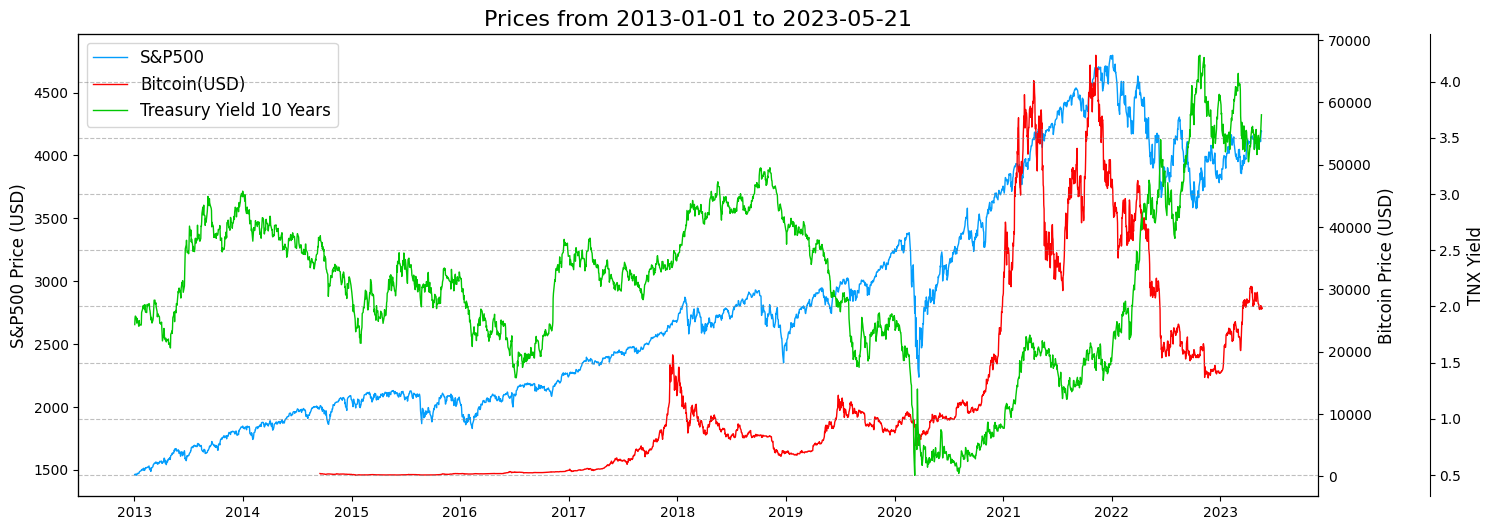

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)

# 첫 번째 데이터프레임 플로팅
x1 = snp500_df.index
y1 = snp500_df['Adj Close']
# ax1.fill_between(x1, 0, y1, color='#b9e1fa')
ax1.plot(y1, color='#039dfc', label=snp500name, linewidth=1.0)

# 두 번째 데이터프레임 플로팅
ax2 = ax1.twinx() # 보조 축 추가
x2 = btc_usd_df.index
y2 = btc_usd_df['Adj Close']
# ax2.fill_between(x2, 0, y2, color='#f8c9cb')
ax2.plot(y2, color='#fc0303', label=btc_usdname, linewidth=1.0)

# 세 번째 데이터프레임 플로팅
ax3 = ax1.twinx()  # 보조 축 추가
ax3.spines['right'].set_position(('outward', 80))  # 세 번째 데이터프레임의 축 위치 조정
x3 = tnx_df.index
y3 = tnx_df['Adj Close']
# ax3.fill_between(x3, 0, y3, color='#d7f8c9')
ax3.plot(y3, color='#01c703', label=tnxname, linewidth=1.0)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=12, frameon=True, facecolor='white')

ax1.set_ylabel('S&P500 Price (USD)', fontsize=12)
ax2.set_ylabel('Bitcoin Price (USD)', fontsize=12)
ax3.set_ylabel('TNX Yield', fontsize=12)

plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.title('Prices from 2013-01-01 to 2023-05-21', fontsize=16)
plt.show()


#### 추세선(Trend)

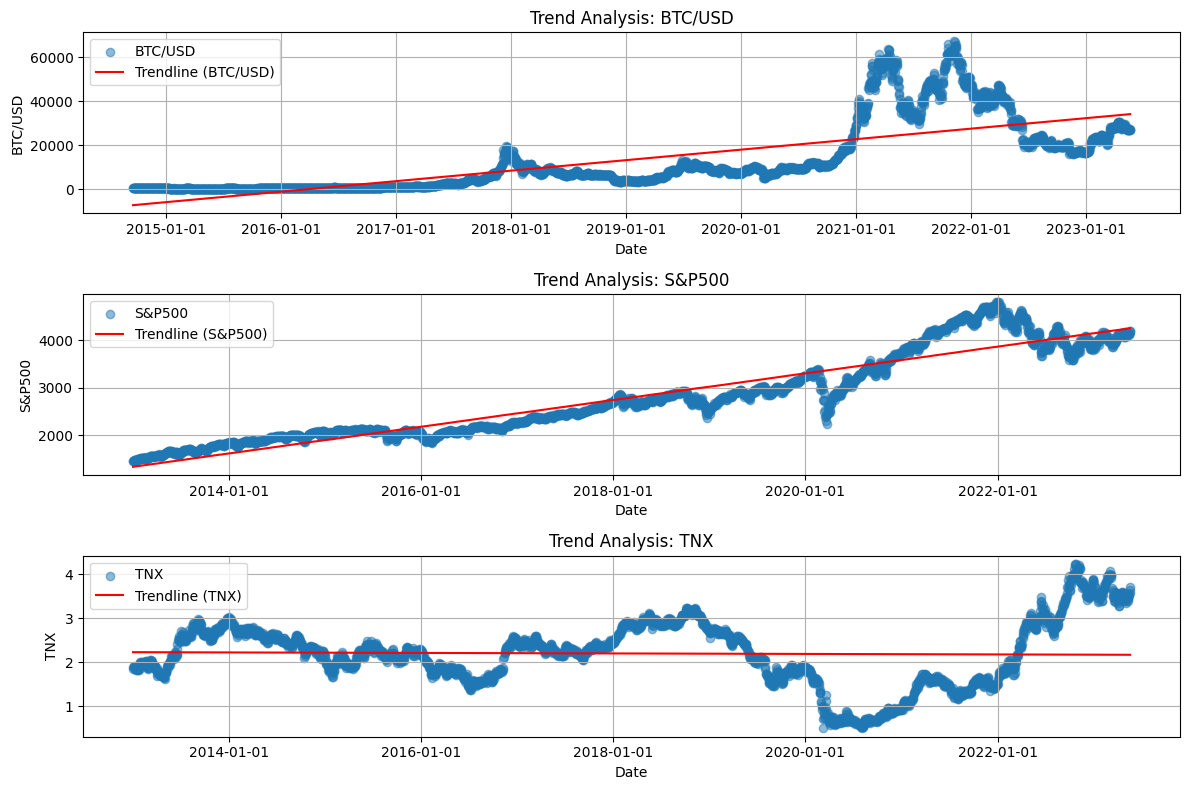

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.dates as mdates

# 서브플롯 설정
fig, axs = plt.subplots(3, 1, figsize=(12, 8))
# x = np.arange(len(btc_usd_df.index)).reshape(-1, 1)

# BTC/USD 추세 시각화
axs[0].scatter(btc_usd_df.index, btc_usd_df['Adj Close'], label='BTC/USD', alpha=0.5)
x_btc = np.arange(len(btc_usd_df.index)).reshape(-1, 1)
model_btc = LinearRegression()
model_btc.fit(x_btc, btc_usd_df['Adj Close'])
y_pred_btc = model_btc.predict(x_btc)
axs[0].plot(btc_usd_df.index, y_pred_btc, color='red', label='Trendline (BTC/USD)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('BTC/USD')
axs[0].set_title('Trend Analysis: BTC/USD')
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # x 축의 날짜 형식 지정
axs[0].legend()
axs[0].grid(True)

# S&P500 추세 시각화
axs[1].scatter(snp500_df.index, snp500_df['Adj Close'], label='S&P500', alpha=0.5)
x_snp = np.arange(len(snp500_df.index)).reshape(-1, 1)
model_snp = LinearRegression()
model_snp.fit(x_snp, snp500_df['Adj Close'])
y_pred_snp = model_snp.predict(x_snp)
axs[1].plot(snp500_df.index, y_pred_snp, color='red', label='Trendline (S&P500)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('S&P500')
axs[1].set_title('Trend Analysis: S&P500')
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # x 축의 날짜 형식 지정
axs[1].legend()
axs[1].grid(True)

# TNX 추세 시각화
axs[2].scatter(tnx_df.index, tnx_df['Adj Close'], label='TNX', alpha=0.5)
x_tnx = np.arange(len(tnx_df.index)).reshape(-1, 1)
model_tnx = LinearRegression()
model_tnx.fit(x_tnx, tnx_df['Adj Close'])
y_pred_tnx = model_tnx.predict(x_tnx)
axs[2].plot(tnx_df.index, y_pred_tnx, color='red', label='Trendline (TNX)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('TNX')
axs[2].set_title('Trend Analysis: TNX')
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # x 축의 날짜 형식 지정
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### 계절성 박스플롯(Seasonality Boxplot)
- Box: 데이터의 25번째 백분위수(1사분위수, Q1)부터 75번째 백분위수(3사분위수, Q3)까지를 나타내는 박스(수평선은 중앙 값)
- 수염(Whiskers): 박스의 위와 아래에 있는 선분. 데이터의 전체 범위를 표현
- 이상치(Outliers): 수염범위를 벗어나는 개별 데이터 포인트

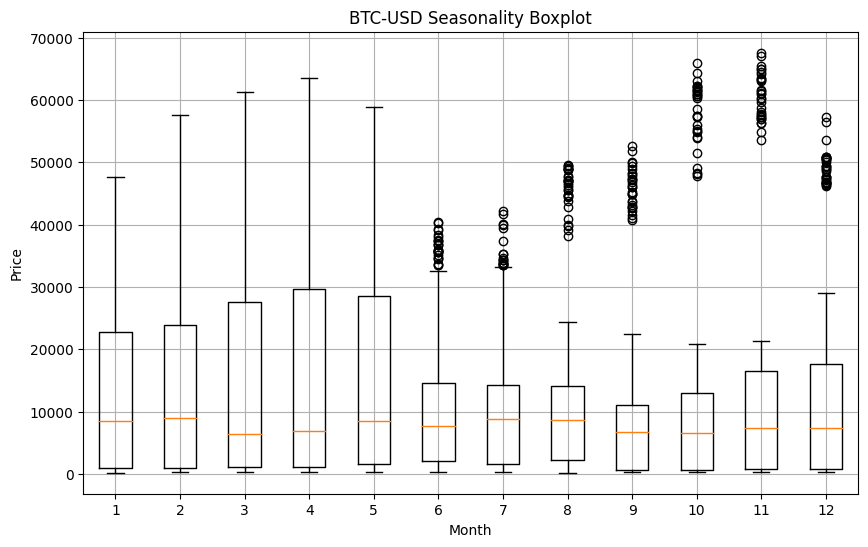

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_usd_df['Month'] = btc_usd_df.index.month  # 또는 btc_usd_df['Quarter'] = btc_usd_df.index.quarter

# 월별 또는 분기별 그룹화
grouped = btc_usd_df.groupby('Month')['Adj Close']

# 계절성 boxplot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
data = [grouped.get_group(month) for month in grouped.groups]
ax.boxplot(data, labels=grouped.groups.keys())
ax.set_xlabel('Month')  # 또는 ax.set_xlabel('Quarter')
ax.set_ylabel('Price')
ax.set_title('BTC-USD Seasonality Boxplot')
plt.grid(True)
plt.show()

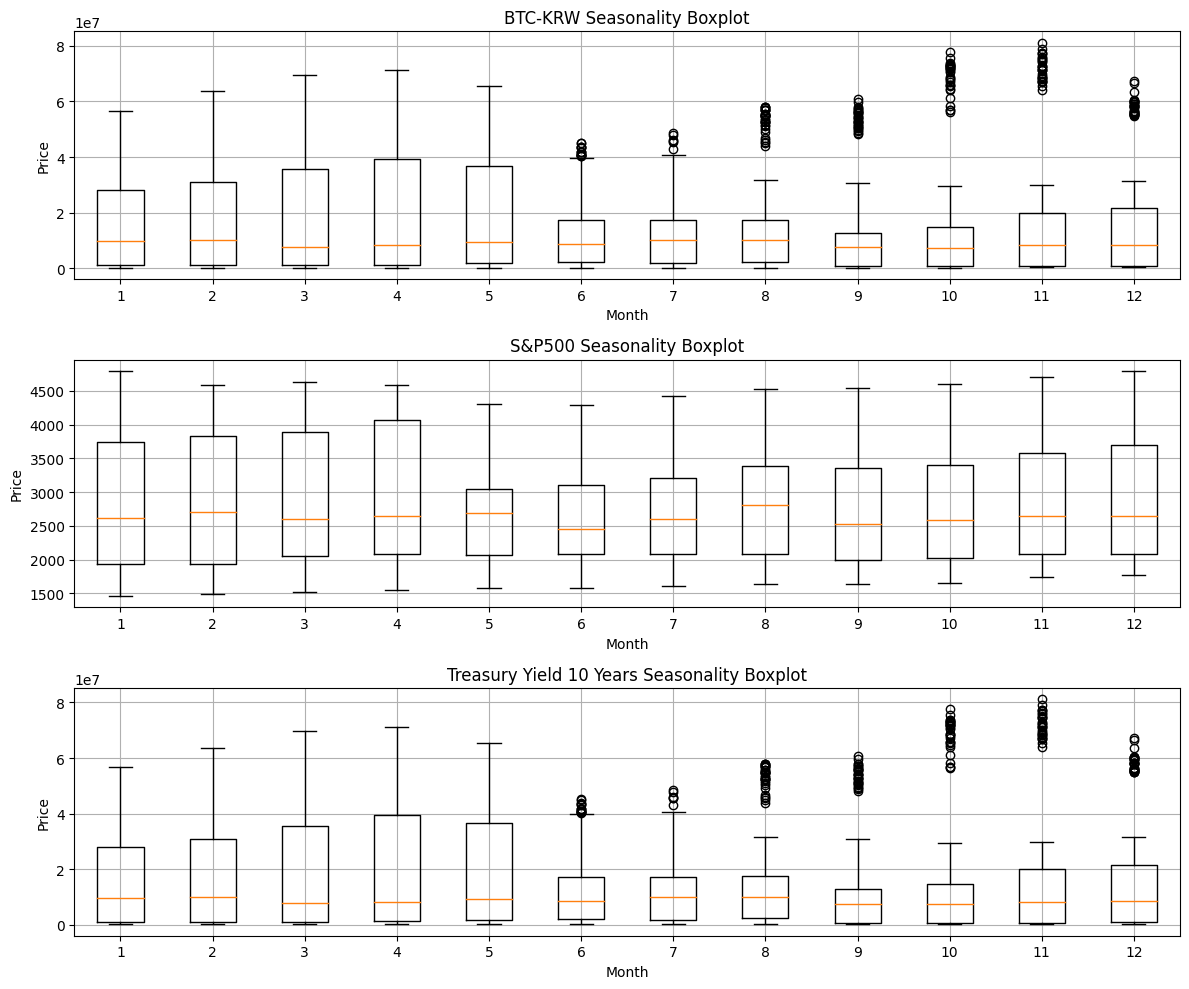

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_krw_df['Month'] = btc_krw_df.index.month
snp500_df['Month'] = snp500_df.index.month
tnx_df['Month'] = tnx_df.index.month

# 월별 또는 분기별 그룹화
grouped1 = btc_krw_df.groupby('Month')['Adj Close']
grouped2 = snp500_df.groupby('Month')['Adj Close']
grouped3 = tnx_df.groupby('Month')['Adj Close']

fig, axs = plt.subplots(3, 1, figsize=(12, 10))

data1 = [grouped1.get_group(month) for month in grouped1.groups]
data2 = [grouped2.get_group(month) for month in grouped2.groups]
data3 = [grouped3.get_group(month) for month in grouped3.groups]

axs[0].boxplot(data1, labels=grouped1.groups.keys())
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Price')
axs[0].set_title('BTC-KRW Seasonality Boxplot')
axs[0].grid(True)

axs[1].boxplot(data2, labels=grouped2.groups.keys())
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Price')
axs[1].set_title('S&P500 Seasonality Boxplot')
axs[1].grid(True)

axs[2].boxplot(data1, labels=grouped1.groups.keys())
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Price')
axs[2].set_title('Treasury Yield 10 Years Seasonality Boxplot')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### 상관관계 히트맵

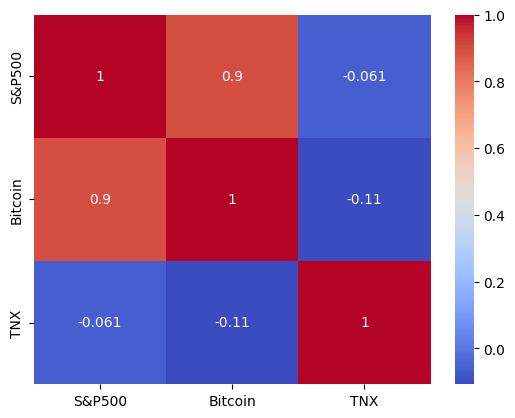

In [22]:
import seaborn as sns
# 세 데이터프레임을 하나의 데이터프레임으로 병합
merged_df = pd.concat([snp500_df['Adj Close'], btc_usd_df['Adj Close'], tnx_df['Adj Close']], axis=1)
merged_df.columns = ['S&P500', 'Bitcoin', 'TNX']

# 상관관계 행렬 생성
correlation_matrix = merged_df.corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 수집 데이터 확인: BTC-KRW를 중심으로

#### BTC-KRW 데이터 개요

In [24]:
print(btc_krw_df.shape)
print(btc_krw_df.info)
btc_krw_df.head()

(3169, 7)
<bound method DataFrame.info of                     Open          High           Low         Close   
Date                                                                 
2014-09-17  4.826118e+05  4.838110e+05  4.681210e+05  4.732035e+05  \
2014-09-18  4.727130e+05  4.762765e+05  4.309914e+05  4.428182e+05   
2014-09-19  4.424667e+05  4.475154e+05  4.012784e+05  4.119893e+05   
2014-09-20  4.118610e+05  4.417305e+05  4.068624e+05  4.267118e+05   
2014-09-21  4.258571e+05  4.303872e+05  4.103040e+05  4.161897e+05   
...                  ...           ...           ...           ...   
2023-05-17  3.629435e+07  3.641902e+07  3.586798e+07  3.630474e+07   
2023-05-18  3.630315e+07  3.662713e+07  3.558536e+07  3.657466e+07   
2023-05-19  3.657846e+07  3.670327e+07  3.529602e+07  3.582342e+07   
2023-05-20  3.581613e+07  3.599155e+07  3.542422e+07  3.563494e+07   
2023-05-21  3.591702e+07  3.613293e+07  3.555129e+07  3.568825e+07   

               Adj Close          Volume  Month

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960,9
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560,9
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935,9
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780,9
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355,9


- index(`Date`): 날짜 인덱스 - 시계열 데이터
- `Open`: 시가
- `High`: 고가
- `Low`: 저가
- `Close`: 종가
- `Adj Close`: 조정 종가
- `Volume`: 거래량
- `Month`: 인덱스에서 추출한 월

In [29]:
pd.options.display.float_format = '{:.1f}'.format # 부동소수점 방식 포맷 변경
btc_krw_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Month
count,3169.0,3169.0,3169.0,3169.0,3169.0,3169.0,3169.0
mean,15906307.8,16289723.8,15490800.2,15915195.5,15915195.5,19782156702282.8,6.5
std,18941961.6,19401704.5,18422279.1,18938959.5,18938959.5,23171835707221.2,3.5
min,191446.8,228260.8,185548.1,192752.0,192752.0,6284822082.0,1.0
25%,863969.3,874918.9,858300.6,870108.9,870108.9,139526616390.0,3.0
50%,8563679.0,8795827.0,8389010.0,8563107.0,8563107.0,10869613512700.0,6.0
75%,26266082.0,27004622.0,25759206.0,26286438.0,26286438.0,34074236532600.0,10.0
max,81117880.0,81038488.0,78265896.0,81138408.0,81138408.0,394793308331130.0,12.0


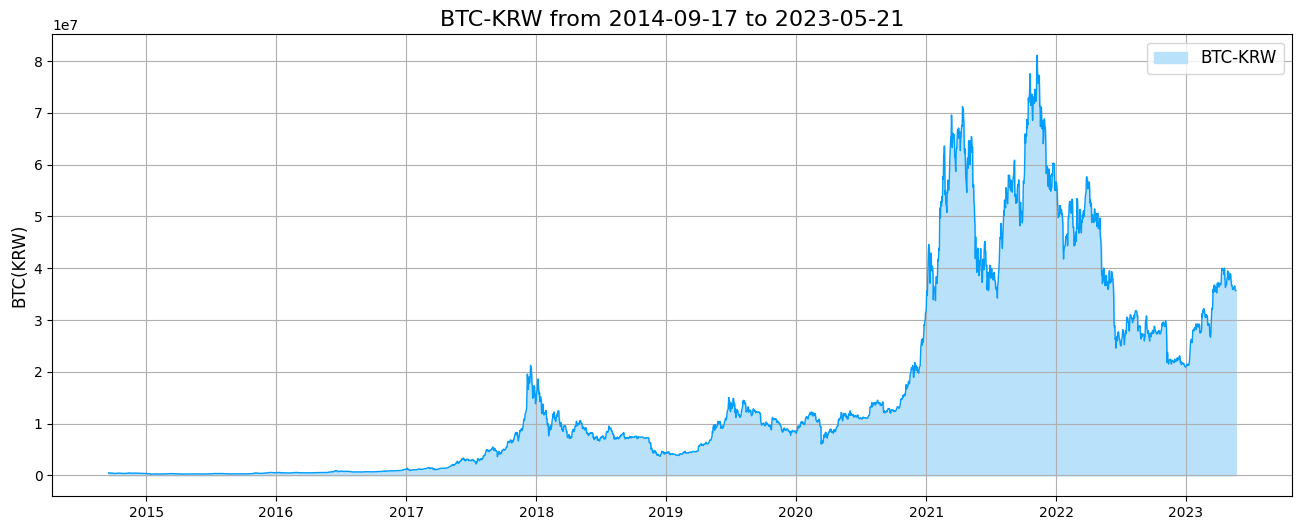

In [42]:
pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize=(16,6))
ax1.xaxis.set_major_locator(years)
x = btc_krw_df.index
y = btc_krw_df['Adj Close']
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.legend(['BTC-KRW'], fontsize=12)
plt.title('BTC-KRW from 2014-09-17 to 2023-05-21', fontsize=16)
plt.plot(y, color='#039dfc', label='S&P500', linewidth=1.0)
plt.ylabel('BTC(KRW)', fontsize=12)
plt.grid(True)
plt.show()

##### n차 함수 추세선 추가

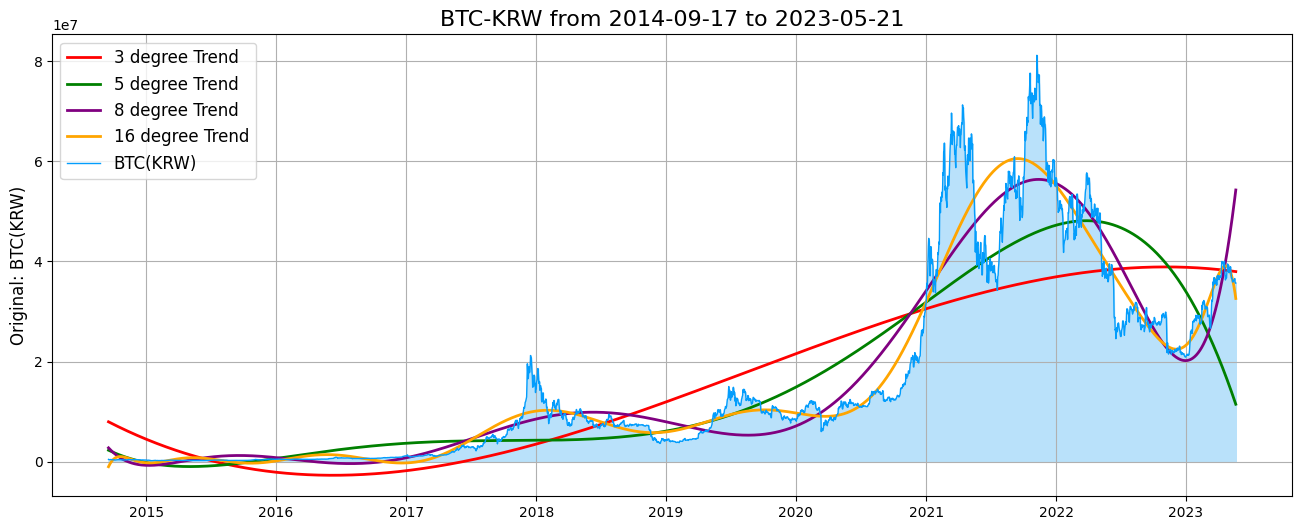

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()

fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)

x = btc_krw_df.index
y = btc_krw_df['Adj Close']
ax1.fill_between(x, 0, y, color='#b9e1fa')
ax1.legend(['BTC-KRW'], fontsize=12)
plt.title('BTC-KRW from 2014-09-17 to 2023-05-21', fontsize=16)

# 3차 함수 적합
poly_degree = 3
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax1.plot(x, poly_y, color='red', label='3 degree Trend', linewidth=2.0)

# 5차 함수 적합
poly_degree = 5
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax1.plot(x, poly_y, color='green', label='5 degree Trend', linewidth=2.0)

# 8차 함수 적합
poly_degree = 8
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax1.plot(x, poly_y, color='purple', label='8 degree Trend', linewidth=2.0)

# 16차 함수 적합
poly_degree = 16
poly_coeff = np.polyfit(np.arange(len(y)), y, poly_degree)
poly_func = np.poly1d(poly_coeff)
poly_y = poly_func(np.arange(len(y)))
ax1.plot(x, poly_y, color='orange', label='16 degree Trend', linewidth=2.0)

plt.plot(y, color='#039dfc', label='BTC(KRW)', linewidth=1.0)
plt.ylabel('BTC(KRW)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

##### 이동평균선

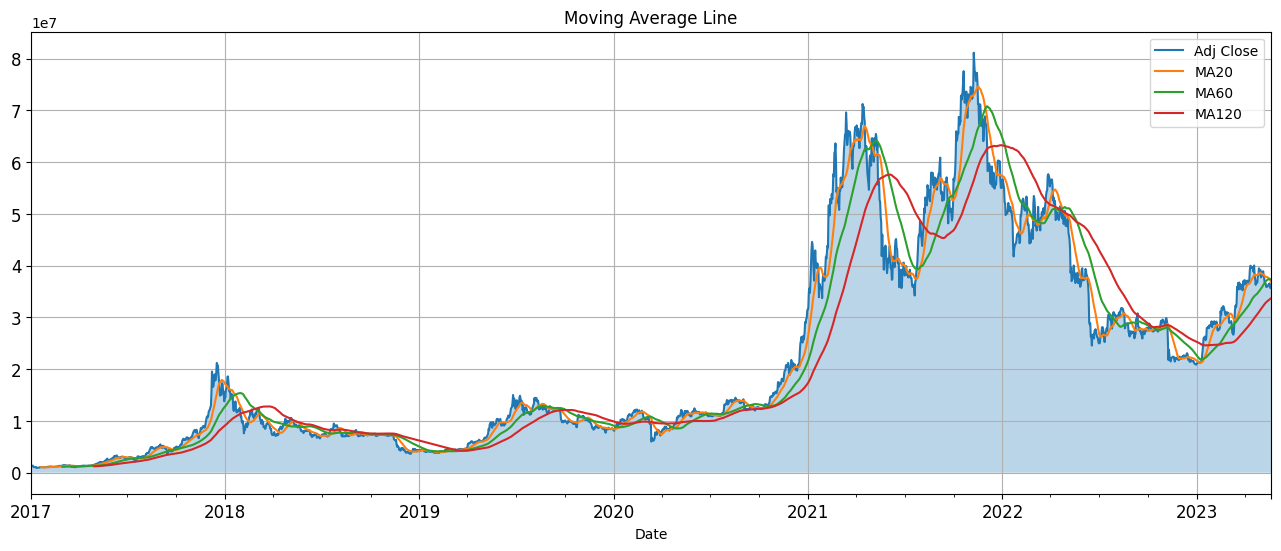

In [106]:
import matplotlib.pyplot as plt

# 그래프 생성
fig, ax = plt.subplots(figsize=(16, 6))

# 데이터 플로팅
btc_krw_df['Adj Close'].loc['2017':].plot(ax=ax, fontsize=12)

# 색 채우기
ax.fill_between(btc_krw_df.index[btc_krw_df.index >= '2017'], btc_krw_df['Adj Close'].loc['2017':], alpha=0.3)

# 이동평균선 플로팅
btc_krw_df['Adj Close'].loc['2017':].rolling(20).mean().plot(ax=ax, label="MA20")
btc_krw_df['Adj Close'].loc['2017':].rolling(60).mean().plot(ax=ax, label="MA60")
btc_krw_df['Adj Close'].loc['2017':].rolling(120).mean().plot(ax=ax, label="MA120")

# 그래프 제목과 범례 추가
plt.title("Moving Average Line")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

#### 회귀분석 - 요소분해: 정상 시계열 여부 판단 및 처리

In [65]:
grouped_btc = btc_krw_df[['Adj Close', 'Month']].groupby('Month').mean().sort_values('Adj Close')
grouped_btc

,Adj Close
Month,
7,1.294579e+07
6,1.315440e+07
9,1.404079e+07
10,1.498540e+07
12,1.505230e+07
8,1.526907e+07
11,1.560495e+07
1,1.580348e+07
5,1.721464e+07


- `btc_krw_df`의 전체 데이터에 대해 월별 조정가(`Adj Close`)를 확인해보면, 7월이 가장 낮고 4월이 가장 높은 것을 확인할 수 있습니다.

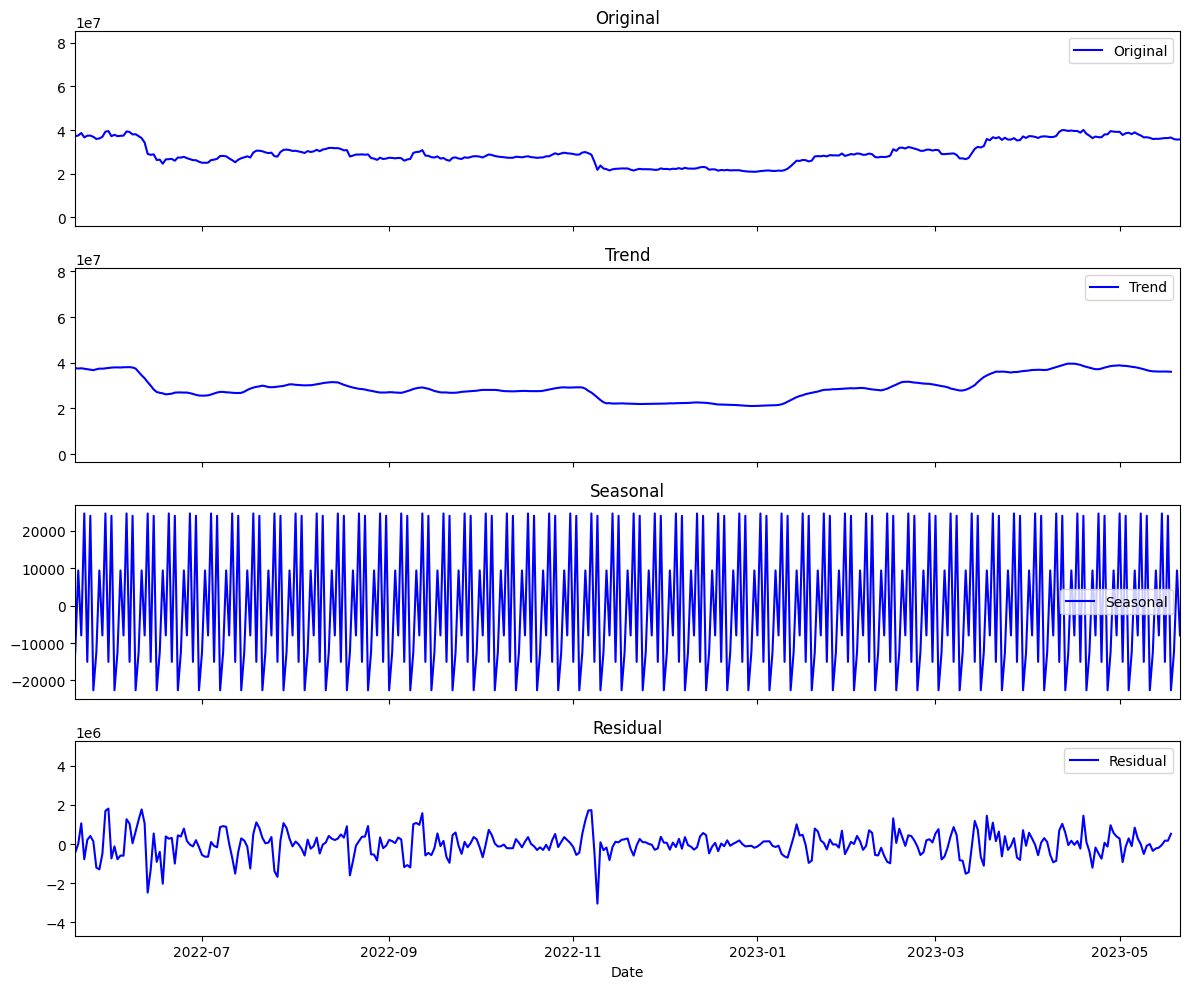

In [95]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 시계열 분해 수행
decomposition = sm.tsa.seasonal_decompose(btc_krw_df['Adj Close'], model='additive')

# 서브플롯 설정
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# 원본 데이터
axs[0].plot(btc_krw_df.index, btc_krw_df['Adj Close'], label='Original', color='b')
axs[0].set_title('Original')
axs[0].legend()

# 추세 구성 요소
axs[1].plot(btc_krw_df.index, decomposition.trend, label='Trend', color='b')
axs[1].set_title('Trend')
axs[1].legend()

# 계절성 구성 요소
axs[2].plot(btc_krw_df.index, decomposition.seasonal, label='Seasonal', color='b')
axs[2].set_title('Seasonal')
axs[2].legend()

# 잔차 구성(불규칙) 요소
axs[3].plot(btc_krw_df.index, decomposition.resid, label='Residual', color='b')
axs[3].set_xlabel('Date')
axs[3].set_title('Residual')
axs[3].legend()

# x 축 범위 설정 (축소)
xmin = pd.to_datetime('2022-05-20')
xmax = btc_krw_df.index[-1]
for ax in axs:
    ax.set_xlim(xmin, xmax)

plt.tight_layout()
plt.show()

https://bluemumin.github.io/adp/2021/03/09/ADP-20%ED%9A%8C-ADP-%EC%8B%A4%EA%B8%B0-python-%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D(%EC%8B%9C%EA%B3%84%EC%97%B4-%EC%A0%95%EC%83%81%EC%84%B1-%EA%B2%80%EC%A6%9D)/

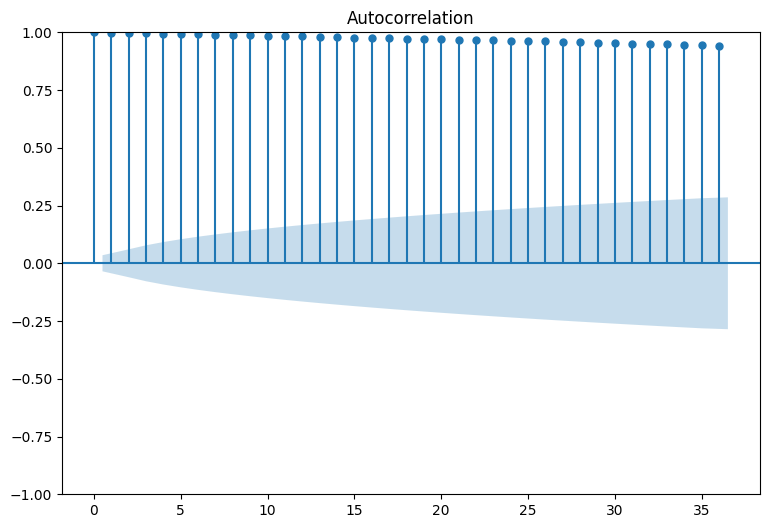

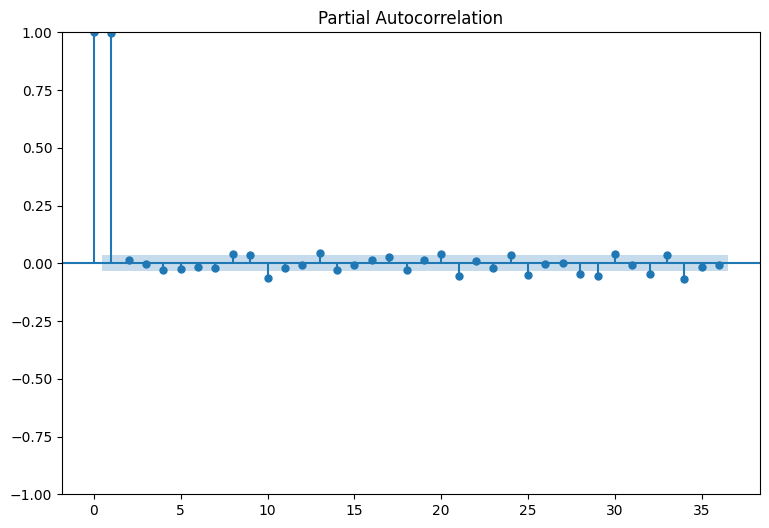

In [96]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams['figure.figsize'] = [9, 6]
plot_acf(btc_krw_df['Adj Close'])
plot_pacf(btc_krw_df['Adj Close'])
plt.show()

#### 변수간 상관관계 분석
`pandas` 또는 `seaborn`으로 피어슨 상관계수를 heatmap으로 표시해봅니다.

In [31]:
pd.reset_option('display.float_format') # 부동소수점 방식 복원

In [36]:
btc_krw_df[btc_krw_df.columns.difference(['Month'])].corr() # `Month`는 제외

,Adj Close,Close,High,Low,Open,Volume
Adj Close,1.000000,1.000000,0.999488,0.999398,0.998858,0.704049
Close,1.000000,1.000000,0.999488,0.999398,0.998858,0.704049
High,0.999488,0.999488,1.000000,0.999038,0.999517,0.709544
Low,0.999398,0.999398,0.999038,1.000000,0.999161,0.697715
Open,0.998858,0.998858,0.999517,0.999161,1.000000,0.705528
Volume,0.704049,0.704049,0.709544,0.697715,0.705528,1.000000


<Axes: >

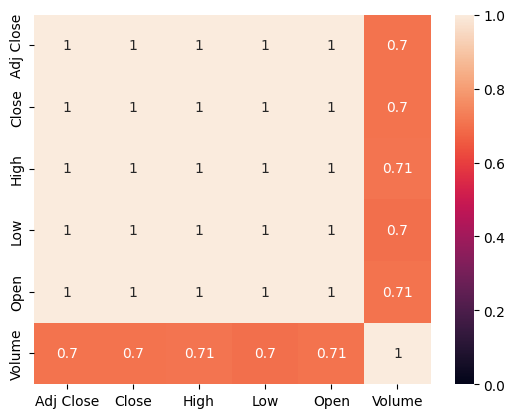

In [38]:
sns.heatmap(btc_krw_df[btc_krw_df.columns.difference(['Month'])].corr(), annot=True, vmin=0, vmax=1)

위 heatmap을 통한 변수간 상관관계는 모두 양의 상관관계를 가지고 있습니다. 이는 모두 약 0.7의 피어슨 상관계수를 가지고 있는데, 강한 양의 선형 관계를 가지고 있음을 의미합니다. 이는 `Open`, `Close`, `High`, `Low`, `Adj Close`가 서로 비슷한 방향으로 움직이고, 상승 또는 하락 추세에 대해 유사한 패턴을 보인다는 것을 의미합니다.

## [2. 데이터 전처리](###목차)

## [3. 탐색적 데이터 분석(EDA)](###목차)


## [4. 모델 선택](###목차)
### 1.단순 회귀 분석 모델
### 2.로지스틱 회귀 분석 모델
### 3.다향 회귀 분석 모델
### 4.LSTM 모델
### 5.CNN(Conv1D)+LSTM 모델
### 6.CNN(Conv2D)+LSTM 모델

## [5. 모델 평가](###목차)
## [6. 결과 및 토의](###목차)
## [7. 참고문헌](###목차)
## [8. 결론](###목차)